The business Objectives is to investigate and analyze the customer loan data, producing a model that can be
used to predict whether a loan will be paid in full or charged off (this occurs when the loan is
unpaid or delinquent for a period of time so the financial institution determines that the debt is
unlikely to be collected).

# 读入Python Package

In [1]:
import os
import requests
import platform
import zipfile
import json
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats
from datetime import datetime

#To plot figs on jupyter
%matplotlib inline
# figure size in inches
rcParams['figure.figsize'] = 14,6
warnings.filterwarnings("ignore")

In [2]:
print("Python version:", platform.python_version())

Python version: 3.7.3


In [3]:
import warnings
warnings.filterwarnings("ignore")

#reading the accepted loans
import pandas as pd

df = pd.read_csv('MLCoE_CaseStudy_Dataset.csv', sep = ',', low_memory=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


Display top 3 records from raw data

## 1. 数据探索性分析

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 144 entries, id to settlement_term
dtypes: float64(115), object(29)
memory usage: 46.7+ MB


There are 42k rows and 144 variables (including target variable) presented in the dataset. 

查看缺失率 （O type指的是Object，类别型变量）

In [5]:
#Check the stats for Object type variables: freq, missng%, top freq value, .. 
df.select_dtypes(include=['O']).describe().T\
    .assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/len(x)))

,count,unique,top,freq,missing_pct
id,1,1,Loans that do not meet the credit policy,1,0.999976
term,42535,2,36 months,31534,0.000071
int_rate,42535,394,10.99%,970,0.000071
grade,42535,7,B,12389,0.000071
sub_grade,42535,35,B3,2997,0.000071
emp_title,39909,30658,US Army,139,0.061804
emp_length,41423,11,10+ years,9369,0.026212
home_ownership,42535,5,RENT,20181,0.000071
verification_status,42535,3,Not Verified,18758,0.000071
issue_d,42535,55,Dec-11,2267,0.000071


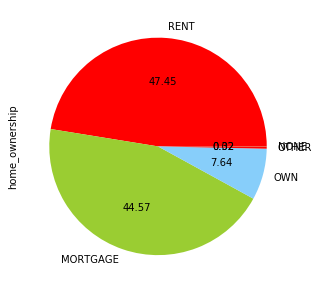

In [6]:
df.home_ownership.value_counts().plot.pie(autopct='%.2f',figsize=(5, 5),colors= ['red','yellowgreen','lightskyblue']) 

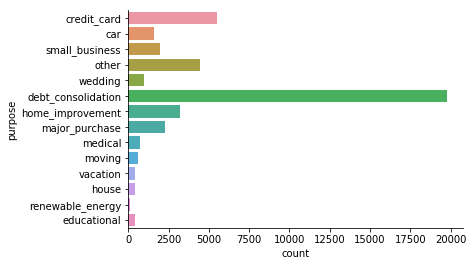

In [7]:
# borrower's loan purpose 
sns.countplot(y=df.purpose)
sns.despine(top=True)

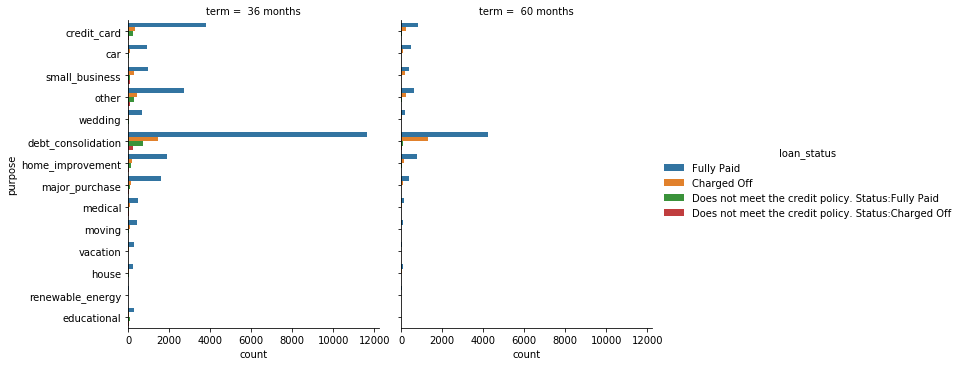

In [8]:
sns.catplot(kind='count', data=df, y='purpose', hue='loan_status', col='term');

Some information to be drawn from above:

1.There are 7 grades type, B has the highest frequency among all types.  
2.Among the 2 terms of loan payment months, mostly (74%) are 36months.   
3.Most borrower's loan purpose is debt consolidation. 
4.Term 60months have a much higer percentage of loans being charged off than term 36 months.
5.Some variables have >99% missing rate, we will take a further look in next steps.   

In [9]:
df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5670.0,14.005540,6.580177,0.0,9.0525,14.295,19.29,29.85
Does not meet the credit policy. Status:Charged Off,761.0,14.343732,7.187256,0.0,9.1000,14.800,19.93,29.96
Does not meet the credit policy. Status:Fully Paid,1988.0,14.107173,7.400106,0.0,8.3375,14.505,20.00,29.95
Fully Paid,34116.0,13.203492,6.687713,0.0,8.0400,13.250,18.46,29.99


charged off loans have higher dti ratios than the ones that are fully paid.

# 1.1 Data Quality

It's imporant to check data quality to filter out variables that provides limit information: 
1. Missing values: Features that have high missing percentages.
2. Data leakage: Features that are not available at the moment determining the qualification, which can only be obtained after the loan has been processed. 

Variables' missing rate are mostly distributed in less than 20% and greater than 90%. 
We will drop the variables with high missing percentage. 

In [11]:
check_missing = df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(df))
check_missing[check_missing>0.6]

inq_fi                      1.000000
num_tl_op_past_12m          1.000000
mort_acc                    1.000000
mths_since_recent_bc        1.000000
mths_since_recent_bc_dlq    1.000000
                              ...   
settlement_status           0.996239
settlement_term             0.996239
next_pymnt_d                0.935375
mths_since_last_record      0.914171
mths_since_last_delinq      0.633058
Length: 91, dtype: float64

Text(0, 0.5, 'count')

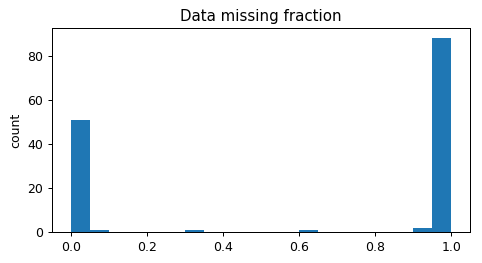

In [12]:
#Missing frac distribution 
plt.figure(figsize=(6,3), dpi=90)
check_missing.plot.hist(bins=20)
plt.title('Data missing fraction')
plt.ylabel('count')

In [ ]:
# 把缺失率在60%以上的列扔掉

In [13]:
drop_list = sorted(list(check_missing[check_missing > 0.6].index))
print(drop_list)

['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'debt_settlement_flag_date', 'deferral_term', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'n

In [14]:
len(drop_list)

91

In [15]:
df.drop(labels=drop_list, axis=1, inplace=True)

In [16]:
df.shape

(42538, 53)

There are a total of 91 variables dropped due to high missing rate and 53 remaining variables. 

In [17]:
print(sorted(df.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'verification_status', 'zip_code']


Next step is to prevent data leakage. I'll take a closer look at the remaining variables by reading the data dictionary to determine their availability from business scenario. 

Payment related information can be unavailable or at least partially unavailable while processing the loan. 
Assuming the business case is to run prediction at loan application to determine the loan qualification, instead of at some point while processing the loan. We will then filter out info that might contain payment information.

According to the data dictionary, variables can contain payment infomation are: 
'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d'       
    
    

In [18]:
df.drop(['acc_now_delinq', 'chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med','debt_settlement_flag','delinq_amnt','funded_amnt','funded_amnt_inv','hardship_flag','inq_last_6mths','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
        'total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt',
        'last_credit_pull_d','pymnt_plan'], axis=1, inplace=True) 

In [19]:
#Check features that have 100% constant value. Removing them as these are not informative. 
cols_unique = list(df.columns[df.nunique()==1])
print('The following features have 100% constant values', cols_unique)

The following features have 100% constant values ['initial_list_status', 'policy_code', 'application_type']


In [20]:
df.drop(cols_unique, axis=1, inplace=True)

In [21]:
print(sorted(df.columns))

['addr_state', 'annual_inc', 'delinq_2yrs', 'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']


In [22]:
#removing variables seem unneccessary at this step (although could be useful for NLP): 'emp_title','title','desc'
df.drop(['emp_title', 'title','desc'], axis=1, inplace=True) 

In [23]:
#sub_grade can be implied by grade as it's a sub-type of grade, therefore to be removed. 
df.drop('sub_grade', axis=1, inplace=True)

In [24]:
#date value doesn't seem useful in this case-  Removing it.
df.drop('issue_d', axis=1, inplace=True)

In [25]:
df.shape

(42538, 23)

Now we got 23 features left in the dataset. 

### 把类别型变化转化为数值型变量

In [26]:
df.dropna(axis=0, how = 'any', inplace = True)

In [27]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [28]:
#transform the term column to integer 
df.term.replace(' 36 months', 36, inplace=True)
df.replace(' 60 months', 60, inplace=True)
df.term = df.term.astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40003 entries, 0 to 42476
Data columns (total 23 columns):
loan_amnt               40003 non-null float64
term                    40003 non-null int64
int_rate                40003 non-null object
installment             40003 non-null float64
grade                   40003 non-null object
emp_length              40003 non-null object
home_ownership          40003 non-null object
annual_inc              40003 non-null float64
verification_status     40003 non-null object
loan_status             40003 non-null object
purpose                 40003 non-null object
zip_code                40003 non-null object
addr_state              40003 non-null object
dti                     40003 non-null float64
delinq_2yrs             40003 non-null float64
earliest_cr_line        40003 non-null object
open_acc                40003 non-null float64
pub_rec                 40003 non-null float64
revol_bal               40003 non-null float64
revol_util

Noticed that several variables are presented as string while expected to be numeric:

int_rate,emp_length,revol_util	

In [1]:
# 对特殊字符做特殊处理

In [30]:
#Tranform these variables into numeric values 
df['int_rate'] = df['int_rate'].str.split('%').str[0]
df['int_rate'] = df.int_rate.astype(float)/100.

In [31]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [32]:
# extract numbers from emp_length and fill missing values with the median
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

In [33]:
df['home_ownership'].value_counts()

RENT        18947
MORTGAGE    18012
OWN          2910
OTHER         134
Name: home_ownership, dtype: int64

In [34]:
#transfrom revol_util to numeric value
df.revol_util = df.revol_util.str.replace("%","")
df[['revol_util']] = df[['revol_util']].apply(pd.to_numeric)

In [35]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, errors = 'coerce')

In [36]:
df.dropna(axis=0, how = 'any', inplace = True)

In [37]:
df['earliest_cr_line'].nunique()

411

In [38]:
#variable earliest_cr_line refers to the earliest time a credit line was opened. 
#This can be informative if transformed into a duration.
dttoday = datetime.now().strftime('%Y-%m-%d')
df.earliest_cr_line = df.earliest_cr_line.apply(lambda x:(np.timedelta64((x - pd.Timestamp(dttoday)),'D').astype(int))/-365)
df.earliest_cr_line.shape

(24921,)

In [39]:
df['earliest_cr_line'].describe()

count    24921.000000
mean        26.609018
std          7.102249
min        -49.408219
25%         22.641096
50%         25.312329
75%         29.646575
max         50.575342
Name: earliest_cr_line, dtype: float64

In [40]:
df['zip_code'].nunique()

789

In [41]:
df.drop(labels='zip_code', axis=1, inplace=True)

In [42]:
dummy_list =['grade','home_ownership','verification_status','purpose','addr_state']
df[dummy_list].isnull().any()
df = pd.get_dummies(df, columns=dummy_list, drop_first=True)

In [43]:
#Let's take a look at our target variable: loan_status
df['loan_status'].value_counts(dropna=False)

Fully Paid                                             20408
Charged Off                                             3208
Does not meet the credit policy. Status:Fully Paid       960
Does not meet the credit policy. Status:Charged Off      345
Name: loan_status, dtype: int64

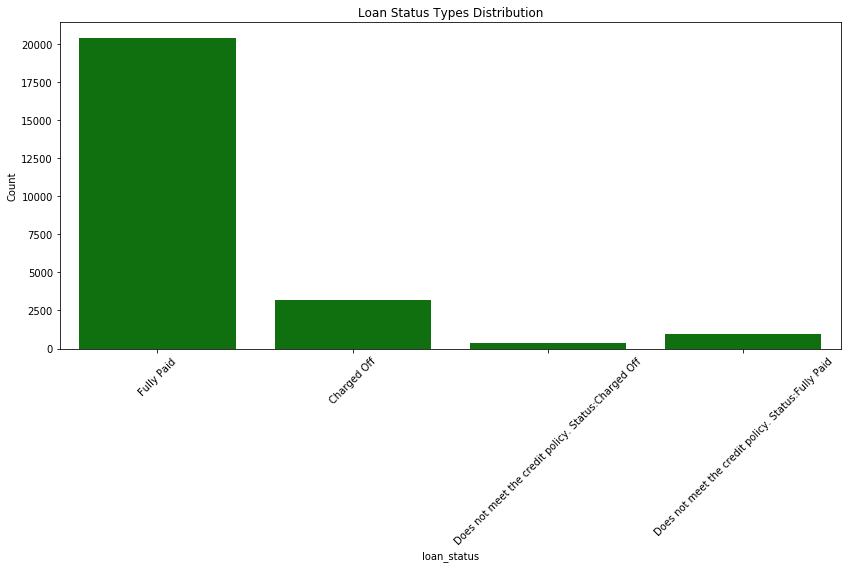

In [44]:
plt.figure(figsize = (14,6))
g = sns.countplot(x="loan_status", data=df, 
                  color='green')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_ylabel("Count")
g.set_title("Loan Status Types Distribution")
plt.show()

Based on my understanding, the business is interested in predicting if a loan would be fully paid or charged off when credit policy is met. Therefore, removing those not meeting credit policy as believe it's processed by other rule and should not be included for modeling. 

In [45]:
df = df.loc[df['loan_status'].isin(['Fully Paid','Charged Off'])]

In [46]:
df['loan_status'].value_counts(normalize=False, dropna=False)

Fully Paid     20408
Charged Off     3208
Name: loan_status, dtype: int64

In [47]:
#Convert target variable to 0/1 indicator Fully Paid = 0, Charged Off = 1
df['loan_status_binary'] = (~df.loan_status.isin(['Fully Paid', 
                                                  
                                                 ])).astype(int)

In [48]:
df.drop('loan_status', axis=1, inplace=True)

In [2]:
# 目标变量分布 - 样本不均衡

Text(0.5, 1.0, 'status Distributions \n (0: Fully Paid || 1: Charged Off)')

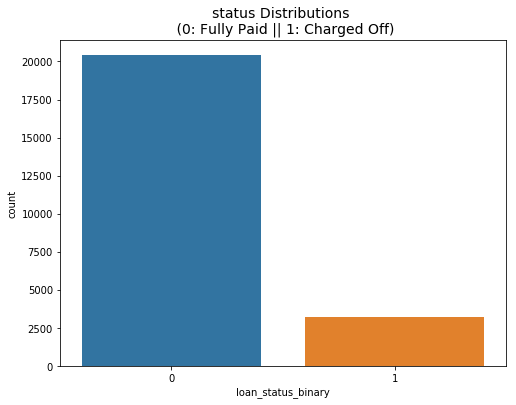

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='loan_status_binary', data=df)
plt.title('status Distributions \n (0: Fully Paid || 1: Charged Off)', fontsize=14)

In [50]:
print('Fully Paid', round(df['loan_status_binary'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Charged Off',round(df['loan_status_binary'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Fully Paid 86.42 % of the dataset
Charged Off 13.58 % of the dataset


Looks like we have imbalanced data issue, this can be leading to a biased model performance. We will try to resolve this later. 

把数值型变量挑出来，以及此前已经转化为数值型变量的类别变量，查看相关性

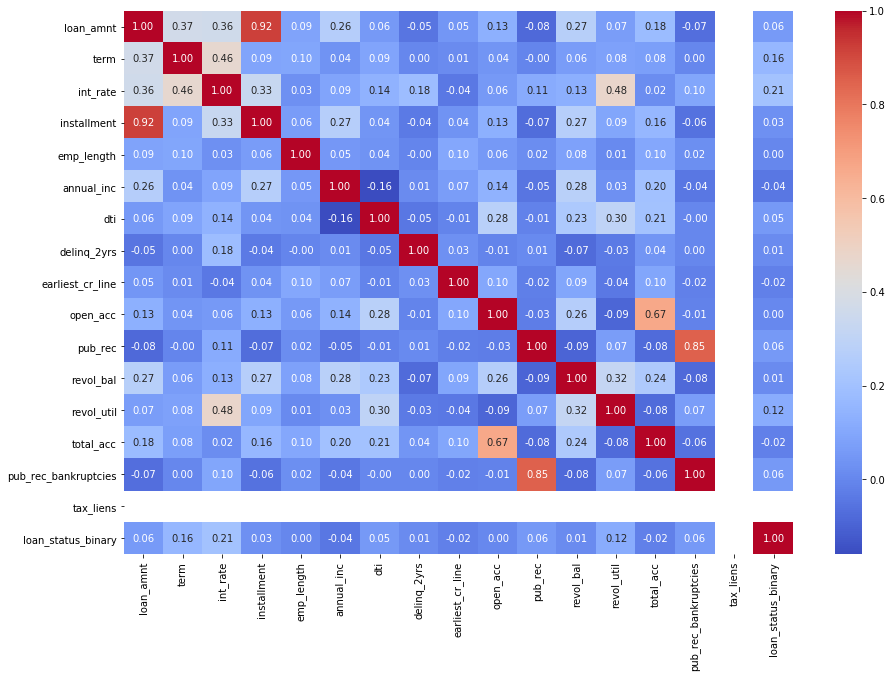

In [51]:
list_num = df.select_dtypes(['float64','int64']).columns
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
cm_df = sns.heatmap(df[list_num].corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax=ax)

The linearly correlated features are:

loan_amnt and installment;
pub_rec_bankruptcies and pub_rec;
total_acc and open_acc.
int_rate has the highest correlation with target variable. 

# 数据预处理


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Using TensorFlow backend.


In [6]:
# #把预测目标变量与训练特征分开，定义为y，特征定义为X
X = df.drop('loan_status_binary', axis=1)
y = df['loan_status_binary']

### 切分训练集与测试集 Train/Test data split

In [54]:
#Standardize X_train with fit_transform, X_test with tranform only.

from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=0)
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train_raw)
X_test = stdsc.transform(X_test_raw)

## 训练模型model train/test/evaluate

In [55]:
#define model set
model_comp = {
    "Random Forest":RandomForestClassifier(random_state=0,n_estimators=10),
    "Logistic Regression":LogisticRegression(random_state=0),
    "Decision Tree":DecisionTreeClassifier(random_state=0)#,
}

tree_number_comp = {
    "Random Forest(1)":RandomForestClassifier(random_state=0,n_estimators=1),
    "Random Forest(5)":RandomForestClassifier(random_state=0,n_estimators=5),
    "Random Forest(10)":RandomForestClassifier(random_state=0,n_estimators=10),
    "Random Forest(15)":RandomForestClassifier(random_state=0,n_estimators=15),
    "Random Forest(20)":RandomForestClassifier(random_state=0,n_estimators=20),
    "Random Forest(25)":RandomForestClassifier(random_state=0,n_estimators=25),
    "Random Forest(30)":RandomForestClassifier(random_state=0,n_estimators=30)
}

In [56]:
# helper function to train model, return a dictionary of trained model
def train_model(model_dict,X_train,y_train):
    for model in model_dict:
        print("Training:",model)
        model_dict[model].fit(X_train,y_train)
    return model_dict

In [57]:
# function to evaluate model performance 
# function to make training and evaluation easier.
from sklearn import metrics
def model_eval(clf_name,clf,X_test,y_test):
    print("Evaluating:",clf_name)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf_name,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    # draw ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr,label=clf_name)
    plt.plot([0,1],[0,1], color = 'black')
    plt.legend()
    return report,confusion_matrix

def train_eval_model(model_dict,X_train,y_train,X_test,y_test):
    cols = ['model', 'roc_auc_score', 'precision', 'recall','f1']
    model_report = pd.DataFrame(columns = cols)
    confusion_matrix_dict = {}
    model_dict = train_model(model_dict,X_train,y_train)
    for model in model_dict:
        report,confusion_matrix = model_eval(model,model_dict[model],X_test,y_test)
        model_report = model_report.append(report,ignore_index=True)
        confusion_matrix_dict[model] = confusion_matrix
    return model_report,confusion_matrix_dict


Training: Random Forest
Training: Logistic Regression
Training: Decision Tree
Evaluating: Random Forest
Evaluating: Logistic Regression
Evaluating: Decision Tree


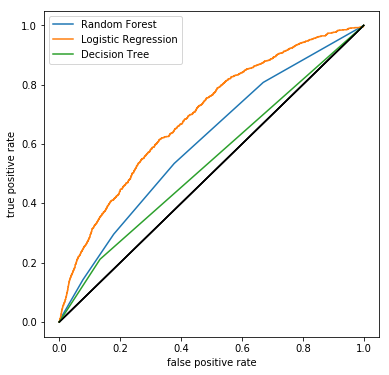

In [58]:
#First we run model on imbalanced dataset
model_report,confusion_matrix_dict = train_eval_model(model_comp,X_train,y_train,X_test,y_test)

In [59]:
confusion_matrix_dict

{'Random Forest': Predicted     0   1
 True               
 0          6066  50
 1           951  18, 'Logistic Regression': Predicted     0   1
 True               
 0          6099  17
 1           958  11, 'Decision Tree': Predicted     0    1
 True                
 0          5297  819
 1           764  205}

In [60]:
#Now we are trying to balance the data and run model again 
from imblearn.over_sampling import SMOTE
index_split = int(len(X)*0.7) #30% testing

X_train_bal, y_train_bal = SMOTE(random_state=0).fit_sample(X_train,y_train)
X_test_bal, y_test_bal = X_test, y_test

In [61]:
len(X_train_bal)

28584

In [62]:
#The orinal training size was:
len(X_train)

16531

In [63]:
sum(y_train_bal)/len(y_train_bal)

0.5

The Charged-Off to Fully Paid ratio in the balanced training set is now 1:1

Training: Random Forest
Training: Logistic Regression
Training: Decision Tree
Evaluating: Random Forest
Evaluating: Logistic Regression
Evaluating: Decision Tree


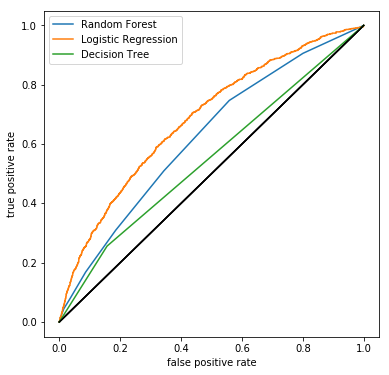

In [64]:
model_report_bal,confusion_matrix_dict_bal = train_eval_model(model_comp,X_train_bal,y_train_bal,X_test_bal,y_test_bal)

In [65]:
confusion_matrix_dict_bal

{'Random Forest': Predicted     0    1
 True                
 0          5894  222
 1           891   78, 'Logistic Regression': Predicted     0     1
 True                 
 0          3862  2254
 1           355   614, 'Decision Tree': Predicted     0    1
 True                
 0          5156  960
 1           721  248}

Training: Random Forest(1)
Training: Random Forest(5)
Training: Random Forest(10)
Training: Random Forest(15)
Training: Random Forest(20)
Training: Random Forest(25)
Training: Random Forest(30)
Evaluating: Random Forest(1)
Evaluating: Random Forest(5)
Evaluating: Random Forest(10)
Evaluating: Random Forest(15)
Evaluating: Random Forest(20)
Evaluating: Random Forest(25)
Evaluating: Random Forest(30)


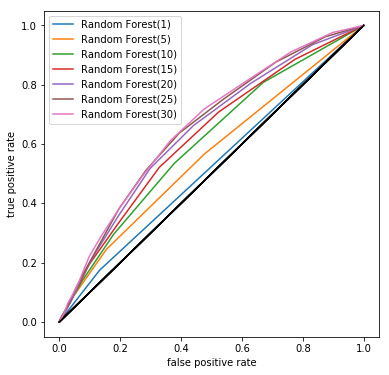

In [66]:
model_report_n_trees,confusion_matrix_dict_n_trees = train_eval_model(tree_number_comp,X_train,y_train,X_test,y_test)

Training: Random Forest(1)
Training: Random Forest(5)
Training: Random Forest(10)
Training: Random Forest(15)
Training: Random Forest(20)
Training: Random Forest(25)
Training: Random Forest(30)
Evaluating: Random Forest(1)
Evaluating: Random Forest(5)
Evaluating: Random Forest(10)
Evaluating: Random Forest(15)
Evaluating: Random Forest(20)
Evaluating: Random Forest(25)
Evaluating: Random Forest(30)


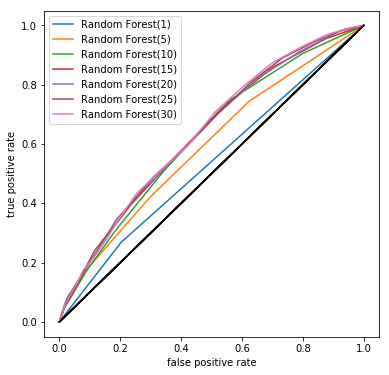

In [67]:
model_report_n_trees_bal,confusion_matrix_dictcm_dict_n_trees_bal = train_eval_model(tree_number_comp,X_train_bal,y_train_bal,X_test_bal,y_test_bal)

In [68]:
model_report_n_trees

,model,roc_auc_score,precision,recall,f1
0,Random Forest(1),0.521065,0.172802,0.174407,0.173600
1,Random Forest(5),0.560546,0.236667,0.073271,0.111899
2,Random Forest(10),0.604994,0.264706,0.018576,0.034716
3,Random Forest(15),0.624475,0.200000,0.015480,0.028736
4,Random Forest(20),0.643051,0.290323,0.009288,0.018000
5,Random Forest(25),0.654631,0.272727,0.009288,0.017964
6,Random Forest(30),0.660451,0.238095,0.005160,0.010101


In [69]:
model_report_n_trees_bal

,model,roc_auc_score,precision,recall,f1
0,Random Forest(1),0.532704,0.173218,0.268318,0.210526
1,Random Forest(5),0.588698,0.233290,0.183695,0.205543
2,Random Forest(10),0.621562,0.260000,0.080495,0.122931
3,Random Forest(15),0.631144,0.259542,0.105263,0.149780
4,Random Forest(20),0.632841,0.317343,0.088751,0.138710
5,Random Forest(25),0.636025,0.292063,0.094943,0.143302
6,Random Forest(30),0.638870,0.300813,0.076367,0.121811


In [70]:
model_report

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.604994,0.264706,0.018576,0.034716
1,Logistic Regression,0.694043,0.392857,0.011352,0.022066
2,Decision Tree,0.538824,0.200195,0.211558,0.205720


In [71]:
model_report_bal

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.621562,0.260000,0.080495,0.122931
1,Logistic Regression,0.684177,0.214086,0.633643,0.320042
2,Decision Tree,0.549484,0.205298,0.255934,0.227836


It's important to look at the recall, as falsed predicting a bad loan to be good can be very costly.
we would like to have less False Nagatives in trade off to have more False Positives 

### Conclusion

Random forest, decision tree and logistic regression were built and evaluated with both balaned and imbalanced train data. By comparision, it can be seen that SMOTE method has improved the recall score overall. Logistic regression seems to have the best performance among all, with a roc_auc_score of 0.684177.